<a href="https://colab.research.google.com/github/Macedolaz/VGG16/blob/main/ProjetoVGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# VGGNET With Keras on Custom Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

TypeError: 'NoneType' object is not subscriptable

In [ ]:
!kaggle datasets download -d macedolaz/corredor2

 29% 5.00M/17.1M [00:00<00:00, 32.6MB/s]
100% 17.1M/17.1M [00:00<00:00, 72.5MB/s]


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile

In [ ]:
file_name = "/content/corredor2.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
#from keras.applications.imagenet_utils import _obtain_input_shape # this will work for older versions of keras. 2.2.0 or before
from keras.applications.resnet50 import preprocess_input
#from keras.engine.topology import get_source_inputs


In [ ]:
def VGGupdated(input_tensor=None,classes=2):

    img_rows, img_cols = 300, 300   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)

    img_input = Input(shape=img_dim)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)


    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.


    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model



In [ ]:
model = VGGupdated(classes = 2) # bedroom and diningroom

In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('corredor')

room_types = os.listdir('corredor')
print (room_types)  #what kinds of rooms are in this dataset

print("Types of rooms found: ", len(dataset_path))



['ComObj', 'SemObj']
Types of rooms found:  2


In [ ]:
rooms = []

for item in room_types:
 # Get all the file names
 all_rooms = os.listdir('corredor' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('corredor' + '/' +item) + '/' + room))
    print(rooms)



[('ComObj', 'corredor/ComObj/ComObj73.jpg')]
[('ComObj', 'corredor/ComObj/ComObj73.jpg'), ('ComObj', 'corredor/ComObj/ComObj80.jpg')]
[('ComObj', 'corredor/ComObj/ComObj73.jpg'), ('ComObj', 'corredor/ComObj/ComObj80.jpg'), ('ComObj', 'corredor/ComObj/ComObj37.jpg')]
[('ComObj', 'corredor/ComObj/ComObj73.jpg'), ('ComObj', 'corredor/ComObj/ComObj80.jpg'), ('ComObj', 'corredor/ComObj/ComObj37.jpg'), ('ComObj', 'corredor/ComObj/ComObj76.jpg')]
[('ComObj', 'corredor/ComObj/ComObj73.jpg'), ('ComObj', 'corredor/ComObj/ComObj80.jpg'), ('ComObj', 'corredor/ComObj/ComObj37.jpg'), ('ComObj', 'corredor/ComObj/ComObj76.jpg'), ('ComObj', 'corredor/ComObj/ComObj45.jpg')]
[('ComObj', 'corredor/ComObj/ComObj73.jpg'), ('ComObj', 'corredor/ComObj/ComObj80.jpg'), ('ComObj', 'corredor/ComObj/ComObj37.jpg'), ('ComObj', 'corredor/ComObj/ComObj76.jpg'), ('ComObj', 'corredor/ComObj/ComObj45.jpg'), ('ComObj', 'corredor/ComObj/ComObj84.jpg')]
[('ComObj', 'corredor/ComObj/ComObj73.jpg'), ('ComObj', 'corredor/ComO

In [ ]:

# Build a dataframe
rooms_df = pd.DataFrame(data=rooms, columns=['room type', 'image'])
print(rooms_df.head())
print(rooms_df.tail())


  room type                         image
0    ComObj  corredor/ComObj/ComObj73.jpg
1    ComObj  corredor/ComObj/ComObj80.jpg
2    ComObj  corredor/ComObj/ComObj37.jpg
3    ComObj  corredor/ComObj/ComObj76.jpg
4    ComObj  corredor/ComObj/ComObj45.jpg
    room type                         image
101    SemObj  corredor/SemObj/SemObj48.jpg
102    SemObj  corredor/SemObj/SemObj13.jpg
103    SemObj   corredor/SemObj/SemObj4.jpg
104    SemObj  corredor/SemObj/SemObj41.jpg
105    SemObj  corredor/SemObj/SemObj37.jpg


In [ ]:

# Let's check how many samples for each category are present
print("Total number of rooms in the dataset: ", len(rooms_df))

room_count = rooms_df['room type'].value_counts()

print("rooms in each category: ")
print(room_count)


Total number of rooms in the dataset:  106
rooms in each category: 
ComObj    53
SemObj    53
Name: room type, dtype: int64


In [ ]:


import cv2
path = 'corredor/'


im_size = 300

images = []
labels = []

for i in room_types:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [ ]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape


(106, 300, 300, 3)

In [ ]:

from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
y=rooms_df['room type'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
y=y.reshape(-1,1)
'''onehotencoder = OneHotEncoder(categorical_features=[0,1])  #Converted  scalar output into vector output where the correct class will be 1 and other will be 0'''
onehotencoder = ColumnTransformer([("corredor", OneHotEncoder(), [0])], remainder = 'passthrough')
Y= onehotencoder.fit_transform(y)
Y.shape  #(40, 2)


(106, 2)

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(100, 300, 300, 3)
(100, 2)
(6, 300, 300, 3)
(6, 2)


In [ ]:

model.fit(train_x, train_y, epochs = 10, batch_size = 32)

Epoch 1/10
4/4 [==============================] - 337s 76s/step - loss: 1.4934 - accuracy: 0.5300
Epoch 2/10
4/4 [==============================] - 334s 76s/step - loss: 0.6944 - accuracy: 0.4900
Epoch 3/10
4/4 [==============================] - 335s 77s/step - loss: 0.6933 - accuracy: 0.5100
Epoch 4/10
4/4 [==============================] - 332s 76s/step - loss: 0.6936 - accuracy: 0.5100
Epoch 5/10
4/4 [==============================] - 338s 77s/step - loss: 0.6937 - accuracy: 0.5100
Epoch 6/10
4/4 [==============================] - 331s 75s/step - loss: 0.6934 - accuracy: 0.5100
Epoch 7/10
4/4 [==============================] - 337s 78s/step - loss: 0.6935 - accuracy: 0.4900
Epoch 8/10
4/4 [==============================] - 332s 76s/step - loss: 0.7002 - accuracy: 0.4900
Epoch 9/10
4/4 [==============================] - 340s 77s/step - loss: 0.6951 - accuracy: 0.4900
Epoch 10/10
4/4 [==============================] - 332s 76s/step - loss: 0.6951 - accuracy: 0.4700


In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 7s 7s/step - loss: 0.6940 - accuracy: 0.3333
Loss = 0.6940292716026306
Test Accuracy = 0.3333333432674408


# Take input from User and Classify that image

Input image shape: (1, 300, 300, 3)


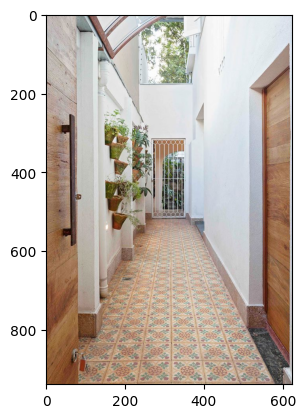

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow


img_path = 'test_img.jpg.jpg'

img = image.load_img(img_path, target_size=(300, 300))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
print(model.predict(x))

1/1 [==============================] - 2s 2s/step
[[0.49853247 0.5014676 ]]
